In [11]:
import numpy as np
import cv2
import cv2
import glob
import depthai  # depthai - access the camera and its data packets
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal



In [12]:
def plot_10(imgs):
    plt.figure(figsize=(20, 8))
    for i in range (2):
        for j in range (5):
            plt.subplot(2,5,5*i+j+1)
            plt.imshow(imgs[5*i+j])

In [13]:
def highlight(R, T, I, use_max=True):
    W, H = I.shape[0], I.shape[1]
    w, h = T.shape[0], T.shape[1]
    wr, hg = R.shape[0], R.shape[1]
        
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    loc = loc + np.array([h//2, w//2])               # Size of R is different from I 
    tl = loc - np.array([h//2, w//2])
    br = loc + np.array([h//2, w//2])
    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
    if use_max:
        print('Max value: ', max_val)
        if max_val >.97:
            cv2.rectangle(I_, tuple(tl), tuple(br), c, 4)
            return I_, True
        else:
            return I_, False
    else:
        if min_val <.1:
            cv2.rectangle(I_, tuple(tl), tuple(br), c, 4)
            return I_, True
        else:
            return I_, False

In [14]:
# Initialize the device

pipeline = depthai.Pipeline()
cam_rgb = pipeline.create(depthai.node.ColorCamera)
cam_rgb.setPreviewSize(640,480)
cam_rgb.setInterleaved(False)
xout_rgb = pipeline.create(depthai.node.XLinkOut)
xout_rgb.setStreamName("rgb")
cam_rgb.preview.link(xout_rgb.input)

In [15]:
# Initialize the video writer

# vid_cod = cv2.VideoWriter_fourcc(*'XVID')
# output = cv2.VideoWriter("videos/cam_video_1.mp4", vid_cod, 20.0, (640,480))

In [16]:
# Capture the video

# with depthai.Device(pipeline) as device:
#     q_rgb = device.getOutputQueue(name="rgb", maxSize=4, blocking=False)
#     while True:
#         in_rgb = q_rgb.tryGet()

#         if in_rgb is not None:
#             shape = (3, in_rgb.getHeight(), in_rgb.getWidth())
#             frame = in_rgb.getData().reshape(shape).transpose(1, 2, 0).astype(np.uint8)
#             frame = np.ascontiguousarray(frame)
#             cv2.imshow("rgb", frame)
#             output.write(frame)
#         if cv2.waitKey(1) == ord('q'):
#             break
    
# output.release()
# cv2.destroyAllWindows()

In [20]:
cap = cv2.VideoCapture("videos/cam_video_1.mp4")
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
captured_frames = [274, 131, 239, 38, 162, 88, 275, 190, 289, 257]
frame_list = []
index = 0
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if index in captured_frames:
            frame_list.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        index += 1
    else:
        break
cap.release()

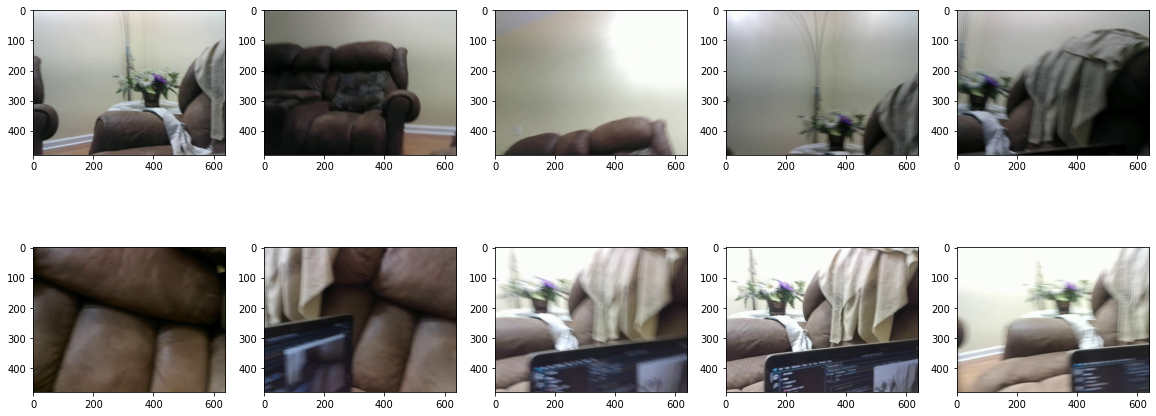

In [21]:
plot_10(frame_list)

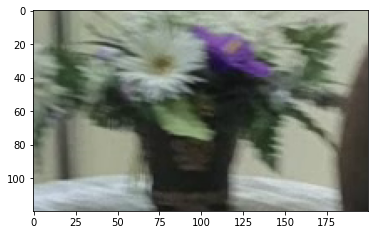

In [22]:
flower = frame_list[0][200:320, 300:500]
plt.imshow(flower)

In [23]:
template = cv2.cvtColor(flower, cv2.COLOR_RGB2GRAY)
scenes = []
for i in range(len(frame_list)):
    img = cv2.cvtColor(frame_list[i], cv2.COLOR_RGB2GRAY)
    scenes.append(img)

Max value:  0.9999999403953552


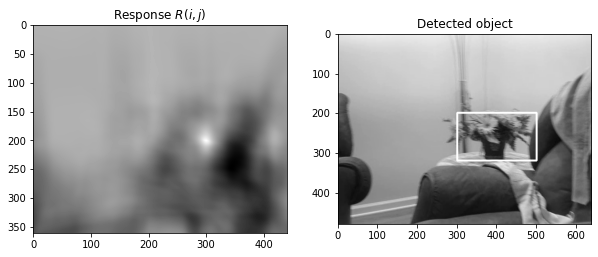

Max value:  0.9067441821098328


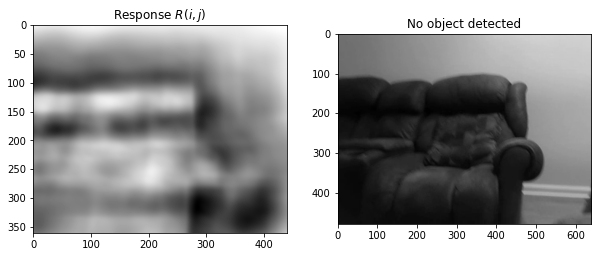

Max value:  0.9096266627311707


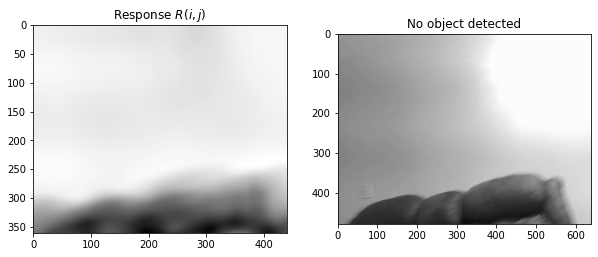

Max value:  0.9808626174926758


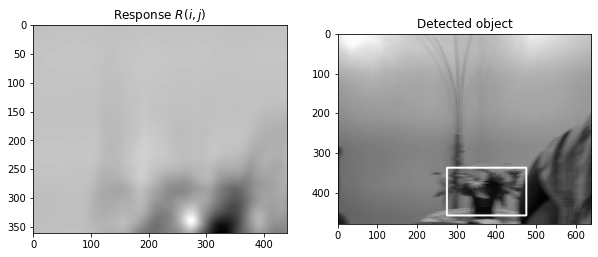

Max value:  0.9259162545204163


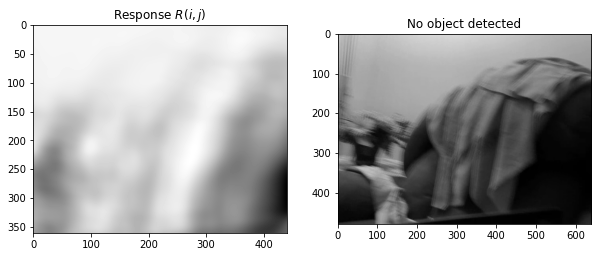

Max value:  0.9131059050559998


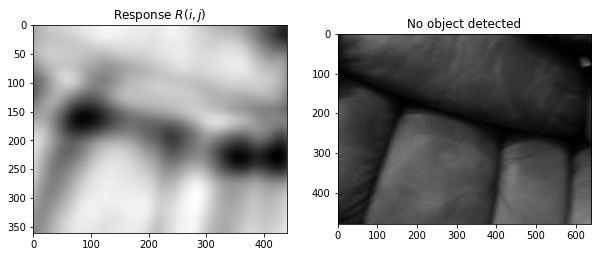

Max value:  0.9148947596549988


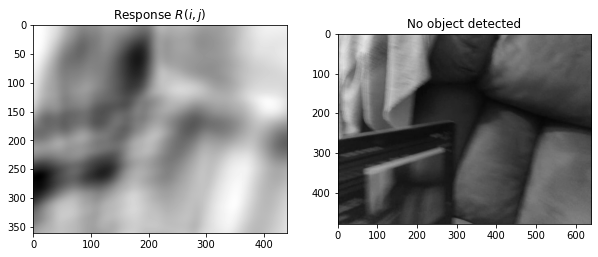

Max value:  0.9752268195152283


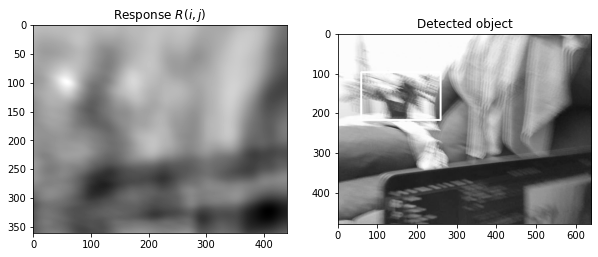

Max value:  0.9772197008132935


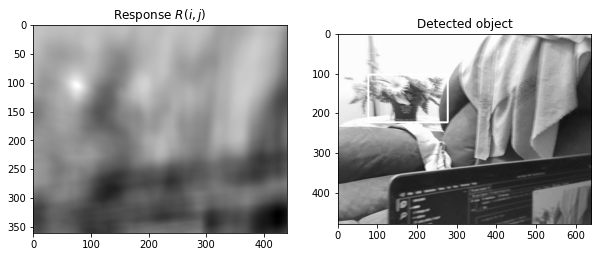

Max value:  0.9724271297454834


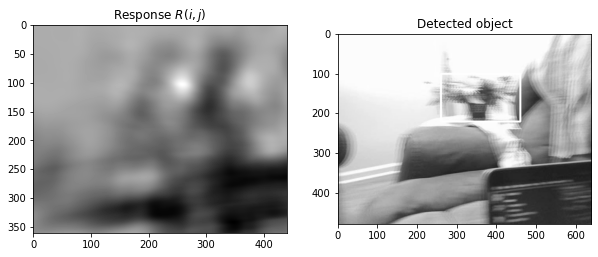

In [24]:
method = 'cv2.TM_CCORR_NORMED'
T = template.copy()
for scene in scenes:
    I = scene.copy()
    R = cv2.matchTemplate(I, T, eval(method))
    I_, exists = highlight(R, T, I, use_max=True)
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.title('Response $R(i,j)$')
    plt.imshow(R, cmap = 'gray')
    plt.subplot(122)
    plt.title('Detected object' if exists else 'No object detected')
    plt.imshow(cv2.cvtColor(I_, cv2.COLOR_BGR2RGB))
    plt.show()
    

